In [2]:
import numpy as np
from matplotlib import pyplot as plt
import csv

X.shape=(3, 100)
y.shape=(1, 100)
508960


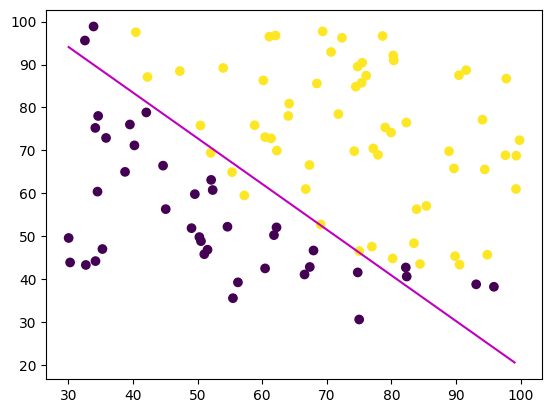

In [3]:
eps = 1e-7  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate

def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    result = (y_1 + y_0).sum() / X.shape[1]
    return result

def simple_gradient_multi(x, y, theta, alpha, eps):
    m = y.shape[1]
    theta = np.copy(theta)
    cost = 0
    prev_cost = float('inf')
    ite = 0
    while True:
        h_y_diff = (h_fun(x, theta) - y)
        gradient = np.dot(h_y_diff, x.T)
        theta = theta - alpha*gradient.T/m
        J = calculate_cost(x,y, theta)
        cost = J
        if abs(prev_cost - cost) < eps:
            break
        prev_cost = cost
        ite += 1
    return theta, cost, ite
    
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}')
print(f'{y.shape=}')

theta1, cost, ite = simple_gradient_multi(X, y, [[0],[0],[0]], alpha, eps)
print(ite)
plt.figure()
plt.scatter(X[1], X[2], c=y, cmap='viridis')
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta1[0, 0]/theta1[2, 0] - theta1[1, 0]/theta1[2, 0]*x1_db
plt.plot(x1_db, x2_db, '-m')




[[-9.87768605]
 [ 3.86694671]]
0.2512600608928869
508960


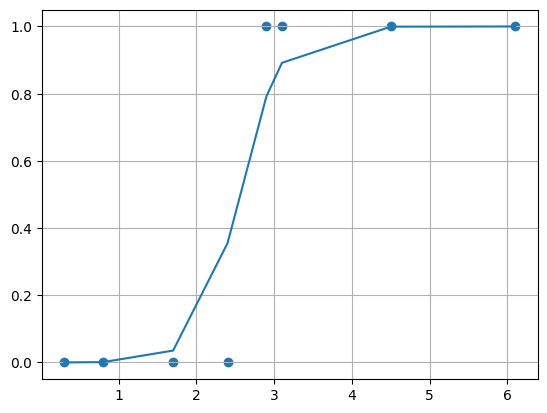

In [4]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])


def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

def gradient_optimization(X, y, theta):
    eps = 1e-7
    cost = 1
    ite = 0
    alpha = 0.001  # learning rate
    while 1:
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        
        m = h_y_diff.shape[1]
        theta = theta - ((alpha * gradient.T) / m) 
        
        previousCost = cost
        cost = calculate_cost(X, y, theta)
        
        ite += 1
        if abs(previousCost - cost) < eps:
            break
    return theta
    
theta = gradient_optimization(X, y, np.array([[0],[0]]))

print(theta)
print(cost)
print(ite)

plt.figure()
plt.plot(X[1], h_fun(X, theta)[0])
plt.scatter(X[1],y)
plt.grid()

In [5]:
eps = 1e-6  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 

theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0
ite = 0
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 

theta = np.array([[0], [0], [0]])


theta = gradient_optimization(X, y, np.array([[0],[0],[0]]))



In [7]:
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db

print(theta)

plt.figure()
plt.scatter(X[1], X[2], c=y[0], cmap="viridis")
plt.plot(x1_db, x2_db)
plt.grid()
print(ite)

KeyboardInterrupt: 

In [29]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])
    
X_mean = np.mean(X,axis=1)
X_mean.shape = [-1, 1]
X_std = np.std(X,axis=1)
X_std.shape = [-1, 1]
X[1:,:] = (X[1:,:]-X_mean[1:,:])/X_std[1:,:]
print(f'{X.shape=}')
print(f'{y.shape=}')
    
theta = gradient_optimization(X, y,np.array([[0], [0], [0], [-1]]))



X.shape=(4, 100)
y.shape=(1, 100)


In [46]:
theta = np.array([[2.19054489],[16.45237189],[ 5.30881111],[-11.29397244]])
a=3

<function matplotlib.pyplot.scatter(x: 'float | ArrayLike', y: 'float | ArrayLike', s: 'float | ArrayLike | None' = None, c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None, marker: 'MarkerType | None' = None, cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, alpha: 'float | None' = None, linewidths: 'float | Sequence[float] | None' = None, *, edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None, plotnonfinite: 'bool' = False, data=None, **kwargs) -> 'PathCollection'>

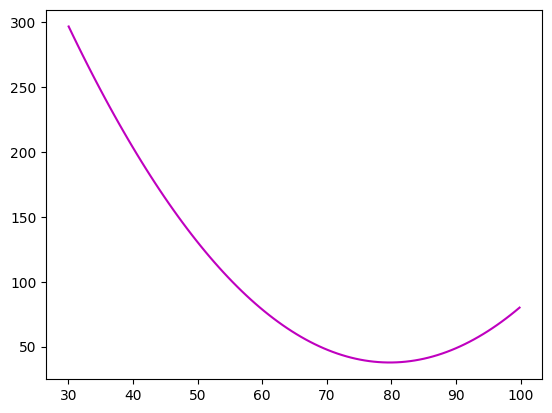

In [48]:

x1_db = np.linspace(X[1, :].min(), X[1, :].max(), 100)
x1_dbb = np.linspace(X[3, :].min(), X[3, :].max(), 100)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db - (theta[3, 0]/theta[2, 0])*x1_db**2
x1_db = x1_db*X_std[1,:] + X_mean[1,:]
x2_db = x2_db*X_std[2,:] + X_mean[2,:]
plt.plot(x1_db, x2_db, '-m') 
plt.scatter

[[0.26707856 0.00949896 0.19825891 0.89899099 0.9610642  0.10258469
  0.96307966 0.49485303 0.98247029 0.68843031 0.84678821 0.17458835
  0.97591095 0.98606427 0.31528103 0.86267039 0.47704999 0.31076175
  0.98096343 0.57479719 0.2265854  0.97271095 0.08535887 0.0135032
  0.92167012 0.69693133 0.60131988 0.80429462 0.2488447  0.12989335
  0.73373897 0.90100722 0.29962385 0.43788627 0.23482344 0.16126951
  0.71753243 0.88946512 0.37153741 0.21177053 0.87604588 0.07828522
  0.98452648 0.56594199 0.06827583 0.29101254 0.9257616  0.998661
  0.96728803 0.99754827 0.96081609 0.98713679 0.82207387 0.0623525
  0.09075705 0.19610849 0.99247936 0.62391749 0.89337633 0.93574888
  0.97782296 0.01925975 0.06116355 0.01600899 0.22548228 0.18497101
  0.79740256 0.09789592 0.99305472 0.61010517 0.01095747 0.85747898
  0.98841836 0.72025221 0.73979454 0.99595131 0.75436171 0.55208743
  0.12010149 0.61068281 0.97943441 0.90844141 0.74023042 0.33464251
  0.99232433 0.95243783 0.43050926 0.98584655 0.9945